# ⛅Weather Recognition using Deep Learning Models

[Link to Kaggle Dataset](https://www.kaggle.com/datasets/jehanbhathena/weather-dataset/download?datasetVersionNumber=3)


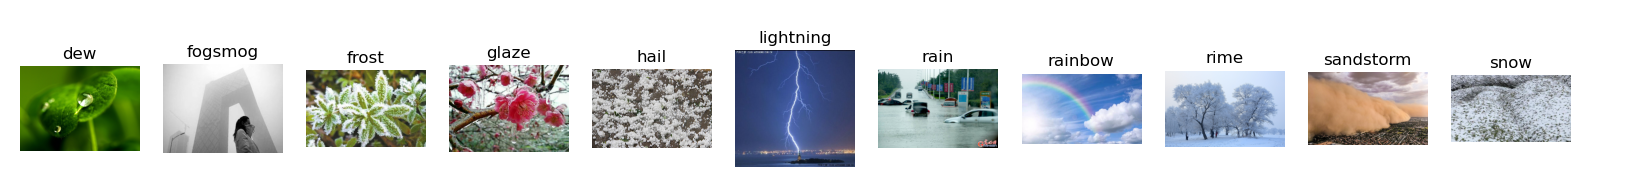

## Dataset Description

This dataset contains labeled 6862 images of different types of weather

<H4> About Dataset </H4>
This dataset contains 6862 images of different types of weather, it can be used to implement weather classification based on the photo.

<H4> Content</H4>
The pictures are divided into 11 classes: dew, fog/smog, frost, glaze, hail, lightning , rain, rainbow, rime, sandstorm and snow.


<H4> Citation </H4>
@data{DVN/M8JQCR_2021,   <br>
author = {Xiao, Haixia},     <br>
publisher = {Harvard Dataverse},  <br>
title = {{Weather phenomenon database (WEAPD)}},   <br>
year = {2021},   <br>
version = {V1},   <br>
doi = {10.7910/DVN/M8JQCR},   <br>
url = {https://doi.org/10.7910/DVN/M8JQCR}

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

2023-12-28 06:06:26.536897: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-28 06:06:26.537005: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-28 06:06:26.537031: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-28 06:06:26.750032: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Making sure we have tensorflow running on GPU

In [2]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
print(f"Number of GPUs: {len(physical_devices)}")

if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("Not detected")

try:
    device_name = tf.config.list_physical_devices('GPU')[0].name
    print(f"Device name: {device_name}")
    with tf.device(device_name):
        x = tf.random.normal([100, 100])
        y = tf.math.square(x)
        print(f"GPU memory usage: {tf.config.experimental.get_memory_info(device_name)['used_alloc']}")
except:
    print("No GPU detected")


print("Built with CUDA: ", tf.test.is_built_with_cuda())
print("Built with GPU support: ", tf.test.is_built_with_gpu_support())
print("Tensorflow version: ", tf.__version__)

Number of GPUs: 1
Device name: /physical_device:GPU:0
No GPU detected
Built with CUDA:  True
Built with GPU support:  True
Tensorflow version:  2.14.0


2023-12-28 06:06:33.984701: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-28 06:06:34.344981: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-28 06:06:34.345035: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-28 06:06:34.350193: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-28 06:06:34.350248: I tensorflow/compile

In [3]:
# set the path to the extracted folder
path = "./data"

# get the list of all the files in the folder
files = os.listdir(path)
print(files)

['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']


In [4]:
# get a count of the number of images in the data folder and all the subfolders
no_of_images = 0
for folder in files:
    no_of_images += len(os.listdir(os.path.join(path, folder)))

print("Number of images in the dataset:", no_of_images)

# get a count of the number of images in each subfolder and create a dictionary with class names and counts
image_count_dict = {}
for folder in files:
    image_count_dict[folder] = len(os.listdir(os.path.join(path, folder)))

print(image_count_dict)

Number of images in the dataset: 6862
{'dew': 698, 'fogsmog': 851, 'frost': 475, 'glaze': 639, 'hail': 591, 'lightning': 377, 'rain': 526, 'rainbow': 232, 'rime': 1160, 'sandstorm': 692, 'snow': 621}


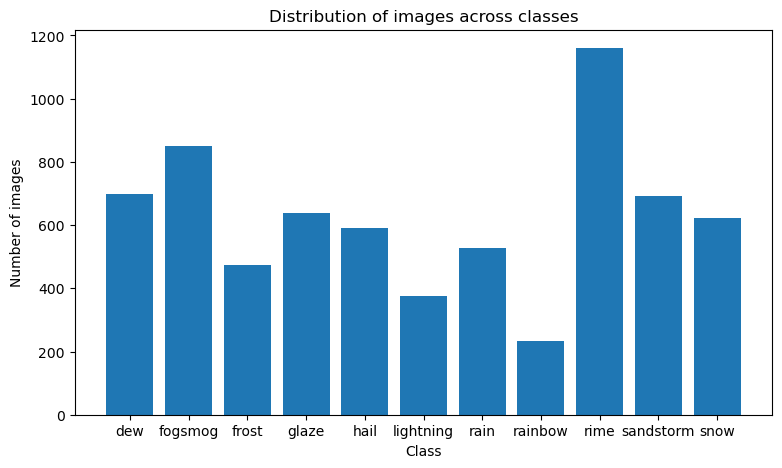

In [7]:
# plot the counts of each class in the form of a horizontal bar graph
plt.figure(figsize=(9, 5))
plt.bar(image_count_dict.keys(), image_count_dict.values())
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.title("Distribution of images across classes")
plt.show()


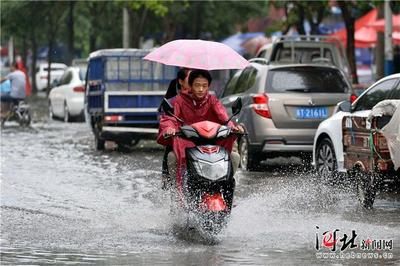

In [8]:
# load a sample image from the dataset
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# set the path to the image
img_path = './data/rain'
name = '1013.jpg'
full_img_path = img_path + '/' + name
# load the image
img = image.load_img(full_img_path)

# Another way to load the image
# imgplot = plt.imshow(img)
img

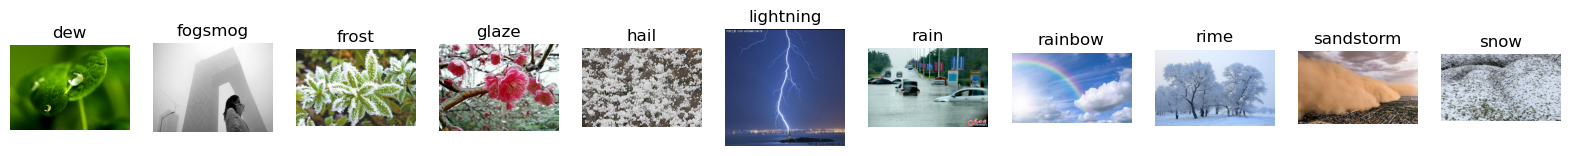

In [9]:
# show a random image from each folder in data folder 
# set the path to the image
img_path = './data'
# get the list of all the folders in the data folder
folders = os.listdir(img_path)
# set the size of the image
plt.figure(figsize=(20, 20))
# loop over all the folders
for i, folder in enumerate(folders):
    # get the list of all the images in the folder
    images = glob.glob(img_path + '/' + folder + '/*')
    # get the first image from the folder
    img = images[0]
    # load the image
    img = image.load_img(img)
    # set the subplot
    plt.subplot(1, len(folders), i+1)
    # plot the image
    plt.imshow(img)
    # set the title of the plot
    plt.title(folder)
    # disable the axis of the plot
    plt.axis('off')

Pre-Trained Neural Network

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

model = Xception(weights='imagenet',
                 input_shape=(299,299,3)
                 )

img = image.load_img(full_img_path, target_size=(299,299))
x = np.array(img)
print(x.shape)
X = np.array([x])
print(X.shape)

X = preprocess_input(X) 
pred = model.predict(X)
pred.shape


(299, 299, 3)
(1, 299, 299, 3)


2023-12-28 06:12:25.023986: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800


1/1 [==============================] - 28s 28s/step


(1, 1000)

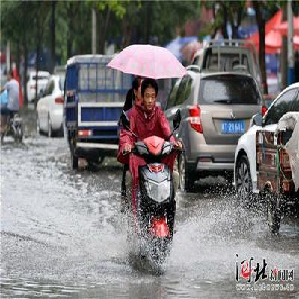

In [11]:
img

In [12]:
decode_predictions(pred, top=10)

[[('n04273569', 'speedboat', 0.16191314),
  ('n03873416', 'paddle', 0.10768094),
  ('n04507155', 'umbrella', 0.05444721),
  ('n02704792', 'amphibian', 0.04865939),
  ('n04252077', 'snowmobile', 0.045914695),
  ('n02536864', 'coho', 0.039919063),
  ('n02951358', 'canoe', 0.03258271),
  ('n04252225', 'snowplow', 0.026481438),
  ('n03599486', 'jinrikisha', 0.021145688),
  ('n02071294', 'killer_whale', 0.010907738)]]

### Prepare images for modeling

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size=(150,150)
batch_size=32

# create a train and validation set for the data
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# get the class indices
# train_generator.class_indices

# get the total number of classes
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")


# get the class labels for the training dataset
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
print(f"Available class labels are: {labels}")

# get the number of images in the training dataset
total_train = train_generator.n
print(f"Number of images in Training set: {total_train}")

# get the number of images in the validation dataset
total_val = validation_generator.n
print(f"Number of images in Validation set: {total_val}")

Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.
Number of classes: 11
Available class labels are: dew
fogsmog
frost
glaze
hail
lightning
rain
rainbow
rime
sandstorm
snow
Number of images in Training set: 5493
Number of images in Validation set: 1369


In [100]:
# get true labels and indices for validation dataset
y_valid_true = validation_generator.classes
print(y_valid_true)

# convert class indices to class labels
class_dict = dict((v,k) for k,v in validation_generator.class_indices.items())
print(class_dict)

y_true = np.array([class_dict[val] for val in y_valid_true])
print(y_true)

[ 0  0  0 ... 10 10 10]
{0: 'dew', 1: 'fogsmog', 2: 'frost', 3: 'glaze', 4: 'hail', 5: 'lightning', 6: 'rain', 7: 'rainbow', 8: 'rime', 9: 'sandstorm', 10: 'snow'}
['dew' 'dew' 'dew' ... 'snow' 'snow' 'snow']


#### Model

In [59]:
# Function to create model

def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    # create the base model
    base_model = Xception(weights='imagenet',
                          input_shape=(150,150,3),
                          include_top=False,  #to create custom dense layer
                          )
    # freeze the base model
    base_model.trainable = False

    ##############################
    # create the new model on top of the base model
    # Define expected image shape as input
    inputs=keras.Input(shape=(150,150,3))

    # Feed inputs to the base model
    base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer

    # Convert matrices into vectors using pooling layer
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    drop = keras.layers.Dropout(droprate)(inner)
    # Create dense layer of 10 classes
    outputs = keras.layers.Dense(num_classes)(drop)

    # Create model for training
    model=keras.Model(inputs, outputs)

    ################################
    # Create optimizer
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate)

    # Define loss function
    loss=keras.losses.CategoricalCrossentropy(from_logits=True) #to keep the raw output of dense layer without applying softmax

    # Compile the model with loss, optimizer and metrics
    model.compile(optimizer=optimizer, 
                loss=loss, 
                metrics=['accuracy'])

    return model



In [60]:
# Create checkpoint to save best model for version 3
filepath = './xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

In [61]:
# Define learning rate
# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.001
size = 100

# Dict to store results
scores = {}


In [62]:
model.input_shape

(None, 299, 299, 3)

In [63]:
# List of dropout rates
# droprates = [0.0, 0.2, 0.5, 0.8]
droprates = [0.2, 0.5]

for droprate in droprates:
    print(droprate)
    
    model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                       droprate=droprate)
    
    # Train for longer (epochs=30) cause of dropout regularization
    history = model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=[checkpoint])
    scores[droprate] = history.history
    
    print()
    print()

0.2
Epoch 1/30


2023-12-21 15:21:10.557324: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d5feea2e00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-21 15:21:10.557362: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-12-21 15:21:10.606254: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-21 15:21:10.970519: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


172/172 [==============================] - 45s 236ms/step - loss: 1.0298 - accuracy: 0.6732 - val_loss: 0.6820 - val_accuracy: 0.7692
Epoch 2/30
172/172 [==============================] - 32s 188ms/step - loss: 0.6025 - accuracy: 0.8005 - val_loss: 0.5995 - val_accuracy: 0.7896
Epoch 3/30
172/172 [==============================] - 32s 185ms/step - loss: 0.4726 - accuracy: 0.8387 - val_loss: 0.5798 - val_accuracy: 0.8006
Epoch 4/30
172/172 [==============================] - 32s 183ms/step - loss: 0.3798 - accuracy: 0.8747 - val_loss: 0.5856 - val_accuracy: 0.8006
Epoch 5/30
172/172 [==============================] - 31s 180ms/step - loss: 0.3254 - accuracy: 0.8928 - val_loss: 0.5896 - val_accuracy: 0.8079
Epoch 6/30
172/172 [==============================] - 30s 177ms/step - loss: 0.2696 - accuracy: 0.9137 - val_loss: 0.5961 - val_accuracy: 0.8035
Epoch 7/30
172/172 [==============================] - 30s 177ms/step - loss: 0.2278 - accuracy: 0.9310 - val_loss: 0.6258 - val_accuracy: 0.8

Plot the validation accuracy for the tested drop rates

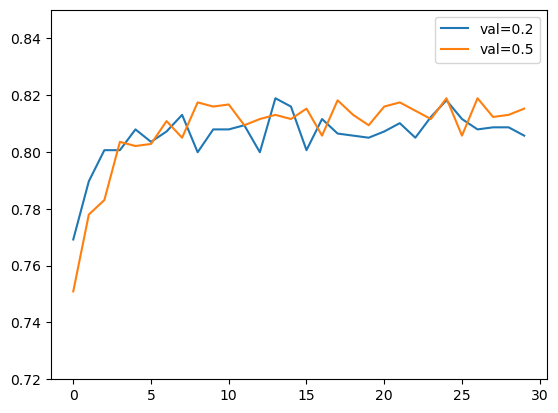

In [65]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.72, 0.85)
plt.legend()

In [132]:
def plot(history,test_gen,train_gen,model):
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])
        
    # # Predict Data Test
    pred = model.predict(test_gen )
    pred = np.argmax(pred,axis=1)
    labels = (train_gen.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]    
    print(pred)

    # Confusion Matrix
    y_valid_true = test_gen.classes
    # print(y_valid_true)
    # convert class indices to class labels
    class_dict = dict((v,k) for k,v in test_gen.class_indices.items())
    # print(class_dict)
    y_test_true = np.array([class_dict[val] for val in y_valid_true])

    # print(test_gen.class_indices)
    cm=confusion_matrix(y_test_true,pred)
    fig, ax = plt.subplots(figsize=(10, 10))

    # plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels=test_gen.class_indices.keys())
    disp.plot(ax=ax)
    plt.show()

    # classification report
    clr = classification_report(y_test_true, pred)
    print(clr)
    # Display 6 picture of the dataset with their labels
    # fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8),
    #                     subplot_kw={'xticks': [], 'yticks': []})

    # for i, ax in enumerate(axes.flat):
    #     ax.imshow(plt.imread(test_df.File_Path.iloc[i+1]))
    #     ax.set_title(f"True: {test_df.Labels.iloc[i+1]}\nPredicted: {pred[i+1]}")
    # plt.tight_layout()
    # plt.show()
        
    return history


In [143]:
validation_generator.labels
# print(pred[0])

array([ 0,  0,  0, ..., 10, 10, 10], dtype=int32)

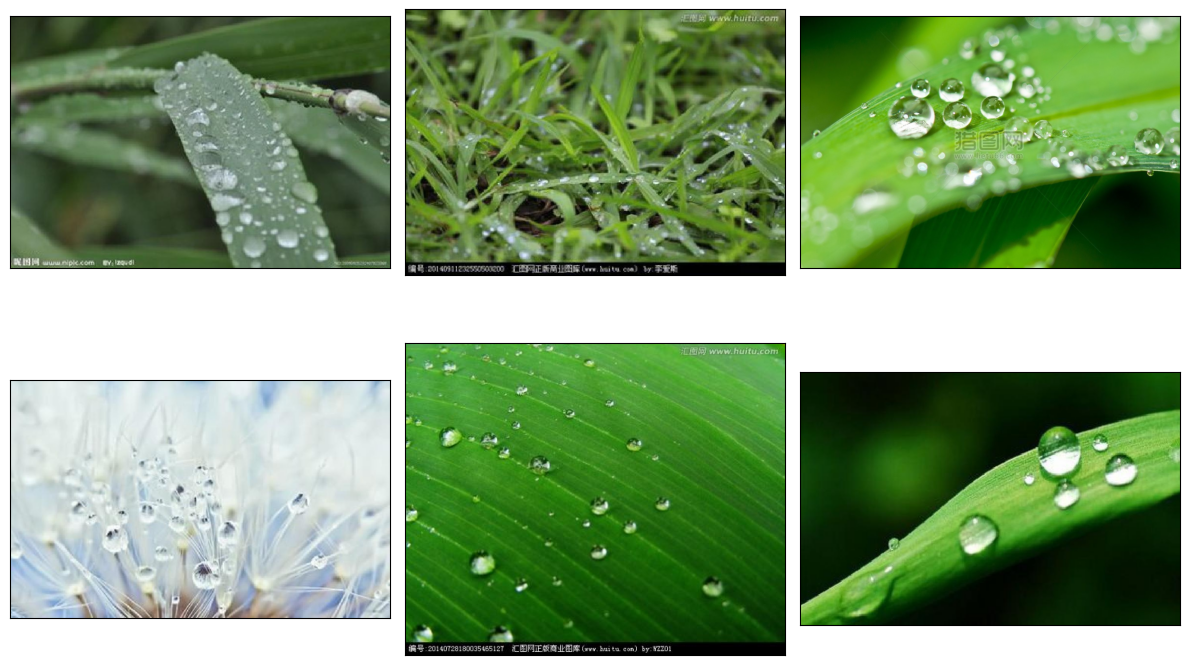

In [145]:
# Display 6 picture of the dataset with their labels
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8),
                    subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(validation_generator.filepaths[i+1]))
    # ax.set_title(f"True: {validation_generator.labels[i+1]}\nPredicted: {pred[i+1]}")
plt.tight_layout()
plt.show()


Final Model

In [66]:
learning_rate = 0.01
size = 100
droprate = 0.5

model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                       droprate=droprate)
    
# Train for longer (epochs=30) cause of dropout regularization
history = model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[checkpoint])

Epoch 1/20
172/172 [==============================] - 33s 178ms/step - loss: 1.4393 - accuracy: 0.5376 - val_loss: 0.7872 - val_accuracy: 0.7239
Epoch 2/20
172/172 [==============================] - 31s 178ms/step - loss: 1.1305 - accuracy: 0.6162 - val_loss: 0.7763 - val_accuracy: 0.7341
Epoch 3/20
172/172 [==============================] - 31s 182ms/step - loss: 1.0877 - accuracy: 0.6281 - val_loss: 0.7189 - val_accuracy: 0.7575
Epoch 4/20
172/172 [==============================] - 32s 185ms/step - loss: 1.0162 - accuracy: 0.6556 - val_loss: 0.7306 - val_accuracy: 0.7582
Epoch 5/20
172/172 [==============================] - 32s 186ms/step - loss: 0.9524 - accuracy: 0.6827 - val_loss: 0.7496 - val_accuracy: 0.7663
Epoch 6/20
172/172 [==============================] - 32s 185ms/step - loss: 0.9078 - accuracy: 0.6914 - val_loss: 0.7572 - val_accuracy: 0.7663
Epoch 7/20
172/172 [==============================] - 32s 185ms/step - loss: 0.8697 - accuracy: 0.6983 - val_loss: 0.7534 - val_ac

43/43 [==============================] - 6s 141ms/step
['rime', 'sandstorm', 'rain', 'rime', 'snow', 'sandstorm', 'snow', 'dew', 'frost', 'rime', 'glaze', 'rainbow', 'sandstorm', 'rime', 'hail', 'rainbow', 'rime', 'fogsmog', 'rime', 'snow', 'dew', 'rime', 'hail', 'fogsmog', 'fogsmog', 'rime', 'hail', 'rain', 'dew', 'fogsmog', 'hail', 'dew', 'fogsmog', 'hail', 'rime', 'fogsmog', 'rain', 'fogsmog', 'fogsmog', 'lightning', 'frost', 'dew', 'fogsmog', 'rime', 'lightning', 'fogsmog', 'rime', 'frost', 'sandstorm', 'glaze', 'dew', 'glaze', 'rime', 'snow', 'rime', 'hail', 'fogsmog', 'rime', 'glaze', 'fogsmog', 'dew', 'glaze', 'snow', 'snow', 'fogsmog', 'sandstorm', 'frost', 'dew', 'hail', 'sandstorm', 'glaze', 'rime', 'hail', 'rime', 'hail', 'snow', 'fogsmog', 'rime', 'hail', 'dew', 'lightning', 'fogsmog', 'fogsmog', 'fogsmog', 'fogsmog', 'lightning', 'rime', 'hail', 'glaze', 'fogsmog', 'hail', 'frost', 'glaze', 'sandstorm', 'fogsmog', 'rain', 'rime', 'sandstorm', 'glaze', 'frost', 'lightning',

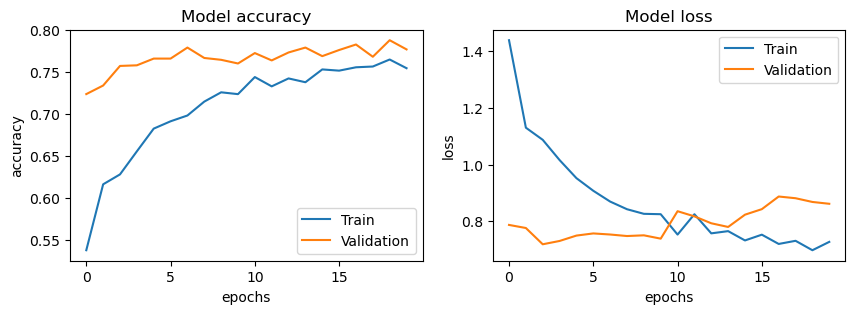

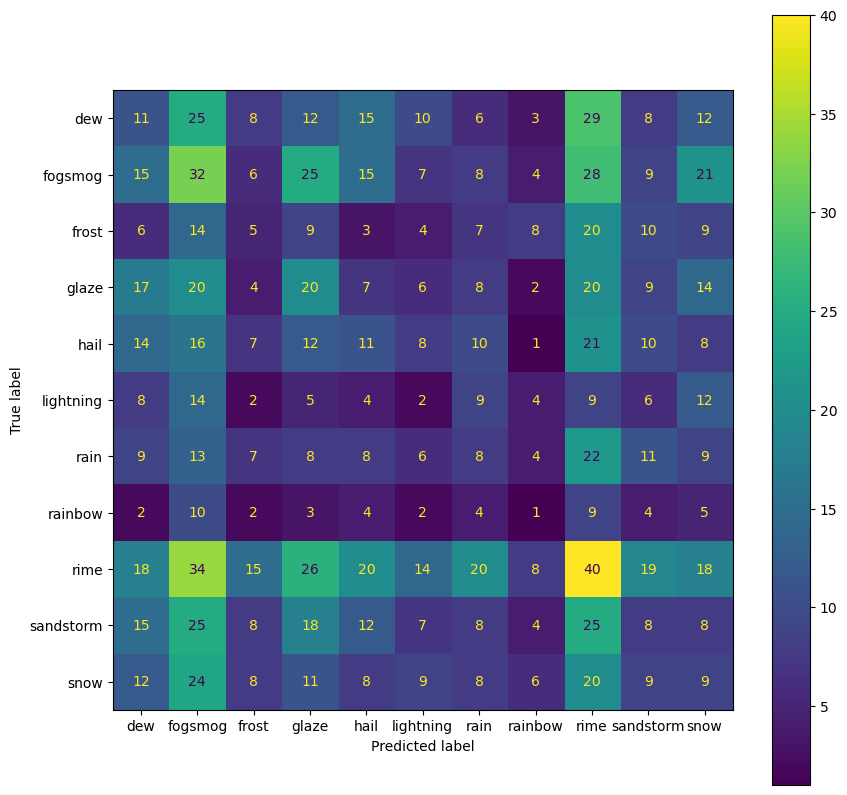

              precision    recall  f1-score   support

         dew       0.09      0.08      0.08       139
     fogsmog       0.14      0.19      0.16       170
       frost       0.07      0.05      0.06        95
       glaze       0.13      0.16      0.14       127
        hail       0.10      0.09      0.10       118
   lightning       0.03      0.03      0.03        75
        rain       0.08      0.08      0.08       105
     rainbow       0.02      0.02      0.02        46
        rime       0.16      0.17      0.17       232
   sandstorm       0.08      0.06      0.07       138
        snow       0.07      0.07      0.07       124

    accuracy                           0.11      1369
   macro avg       0.09      0.09      0.09      1369
weighted avg       0.10      0.11      0.10      1369



In [133]:
history_Xception = plot(history,validation_generator,train_generator, model)

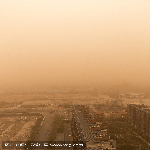

In [151]:
# check the prediction of some examples
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# set the path to the image
img_path = './data/sandstorm'
name = '2927.jpg'
full_img_path = img_path + '/' + name
# load the image
img = image.load_img(full_img_path, target_size=(150,150))
img


In [174]:

# convert the image to array
x = image.img_to_array(img)
# print(x.shape)

# make into array and scale
img_array = np.array([x]) / 255.0
# print(img_array.shape)
predictions = model.predict(img_array)
# print(predictions)

# get the index of the class with maximum probability
index = np.argmax(predictions[0])
index

# get the class label
labels = train_generator.class_indices
label_val = dict((v,k) for k,v in labels.items())
pred_weather = label_val[index]
print(f"The weather in the image is predicted to be {pred_weather}")


1/1 [==============================] - 0s 25ms/step
The weather in the image is predicted to be sandstorm


In [37]:
model = keras.models.load_model('xception_v3_28_0.825.h5')
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 100)               204900    
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 11)                1111      
                                                           